<a href="https://colab.research.google.com/github/SridharaniKatipally/Learnflow-DataScience/blob/main/Health_Insurance_Claim_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3) (1).zip


In [ ]:
# Load the dataset
df = pd.read_csv("/content/archive (3).zip")

# Display first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())



   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  
             index    PatientID          age          bmi  bloodpressure  \
count  1340.000000  1340.000000  1335.000000  1340.000000    1340.000000   
mean    669.500000   670.500000    38.078652    30.668955      94.157463   
std     386.968991   386.968991    11.102924     6.106735      11.434712   
min       0.000000     1.000000    18.000000    16.00

   index  PatientID   age gender   bmi  bloodpressure diabetic  children  \
0      0          1  39.0   male  23.2             91      Yes         0   
1      1          2  24.0   male  30.1             87       No         0   
2      2          3   NaN   male  33.3             82      Yes         0   
3      3          4   NaN   male  33.7             80       No         0   
4      4          5   NaN   male  34.1            100       No         0   

  smoker     region    claim  
0     No  southeast  1121.87  
1     No  southeast  1131.51  
2     No  southeast  1135.94  
3     No  northwest  1136.40  
4     No  northwest  1137.01  
             index    PatientID          age          bmi  bloodpressure  \
count  1340.000000  1340.000000  1335.000000  1340.000000    1340.000000   
mean    669.500000   670.500000    38.078652    30.668955      94.157463   
std     386.968991   386.968991    11.102924     6.106735      11.434712   
min       0.000000     1.000000    18.000000    16.00

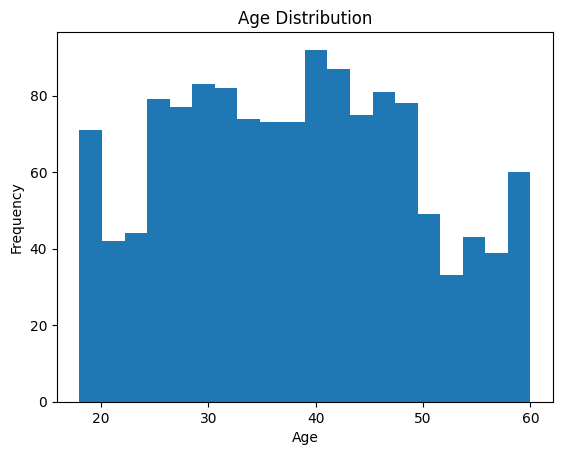

In [ ]:
# Display first few rows of the dataset
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Data visualization (optional)
# Example: Histogram of age distribution
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()


In [ ]:
# Check the columns in the dataset
print(df.columns)

# Drop irrelevant columns (if any)
columns_to_drop = ['policy_number', 'policy_bind_date', 'policy_state', 'insured_zip', 'insured_occupation', 'insured_education_level', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_location', 'auto_model']

# Filter out non-existent columns
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop existing columns
df = df.drop(columns_to_drop, axis=1)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)



Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


In [ ]:
# Check the columns in the dataset
print(df.columns)

# Drop irrelevant columns (if any)
columns_to_drop = ['index', 'PatientID']
df = df.drop(columns_to_drop, axis=1)

# Convert categorical variables to dummy variables (already done for 'gender', 'diabetic', 'smoker', 'region')
# Ensure that 'claim' is your target variable

# Split data into features and target variable
X = df.drop('claim', axis=1)
y = df['claim']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Index(['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children',
       'claim', 'gender_male', 'diabetic_Yes', 'smoker_Yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)


In [ ]:
# Check the columns in the dataset
print(df.columns)

# No need to drop non-existent columns
# Proceed to ensure the target variable 'claim' is categorical if it's not already
df['claim'] = df['claim'].astype('int')

# Handle missing values by imputing
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values (e.g., mean)
imputer = SimpleImputer(strategy='mean')

# Split data into features and target variable
X = df.drop('claim', axis=1)
y = df['claim']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Ensure target variable is of integer type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Step 6: Model Training
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train_scaled, y_train)

# Step 7: Model Evaluation
# Predictions
y_pred = rf_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Step 8: Conclusion
# Conclusion
print("Our model achieved an accuracy of", accuracy)
print("Further steps could involve hyperparameter tuning and exploring other models.")




Index(['age', 'bmi', 'bloodpressure', 'children', 'claim', 'gender_male',
       'diabetic_Yes', 'smoker_Yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')
Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        1149       0.00      0.00      0.00       0.0
        1261       0.00      0.00      0.00       0.0
        1391       0.00      0.00      0.00       0.0
        1526       0.00      0.00      0.00       0.0
        1621       0.00      0.00      0.00       1.0
        1631       0.00      0.00      0.00       1.0
        1632       0.00      0.00      0.00       2.0
        1633       0.00      0.00      0.00       0.0
        1635       0.00      0.00      0.00       0.0
        1665       0.00      0.00      0.00       0.0
        1694       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Check the distribution of the target variable
print(y.value_counts())


claim
1704     3
13470    2
1639     2
9447     2
14394    2
        ..
6500     1
6496     1
6474     1
6457     1
63770    1
Name: count, Length: 1281, dtype: int64


In [ ]:
# Check for any remaining NaN values after imputation
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())


0
0


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the classifier
lr_classifier.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_classifier.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Logistic Regression Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        1149       0.00      0.00      0.00       0.0
        1242       0.00      0.00      0.00       0.0
        1261       0.00      0.00      0.00       0.0
        1621       0.00      0.00      0.00       1.0
        1631       0.00      0.00      0.00       1.0
        1632       0.00      0.00      0.00       2.0
        1633       0.00      0.00      0.00       0.0
        1635       0.00      0.00      0.00       0.0
        1639       0.00      0.00      0.00       0.0
        1694       0.00      0.00      0.00       1.0
        1702       0.00      0.00      0.00       1.0
        1704       0.00      0.00      0.00       0.0
        1708       0.00      0.00      0.00       2.0
        1712       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Feature importance in Random Forest
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


            Feature  Importance
1               bmi    0.266066
0               age    0.222463
2     bloodpressure    0.221645
3          children    0.090057
5      diabetic_Yes    0.055650
6        smoker_Yes    0.031141
8  region_southeast    0.030267
9  region_southwest    0.027891
4       gender_male    0.027466
7  region_northwest    0.027354


In [ ]:
# Step 5: Data Preprocessing
print(df.columns)

# No need to drop non-existent columns
df['claim'] = df['claim'].astype('int')

# Handle missing values by imputing
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X = df.drop('claim', axis=1)
y = df['claim']

# Check class distribution
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

# Ensure no NaNs
print(np.isnan(X_train_scaled).sum())
print(np.isnan(X_test_scaled).sum())

# Step 6: Model Training
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Step 7: Model Evaluation
y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Logistic Regression as alternative model
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train_scaled, y_train)

y_pred_lr = lr_classifier.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

class_report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", class_report_lr)

# Feature Importance in Random Forest
importances = rf_classifier.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


Index(['age', 'bmi', 'bloodpressure', 'children', 'claim', 'gender_male',
       'diabetic_Yes', 'smoker_Yes', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')
claim
1704     3
13470    2
1639     2
9447     2
14394    2
        ..
6500     1
6496     1
6474     1
6457     1
63770    1
Name: count, Length: 1281, dtype: int64
0
0
Random Forest Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        1149       0.00      0.00      0.00       0.0
        1261       0.00      0.00      0.00       0.0
        1391       0.00      0.00      0.00       0.0
        1526       0.00      0.00      0.00       0.0
        1621       0.00      0.00      0.00       1.0
        1631       0.00      0.00      0.00       1.0
        1632       0.00      0.00      0.00       2.0
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

Logistic Regression Accuracy: 0.0
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

        1149       0.00      0.00      0.00       0.0
        1242       0.00      0.00      0.00       0.0
        1261       0.00      0.00      0.00       0.0
        1621       0.00      0.00      0.00       1.0
        1631       0.00      0.00      0.00       1.0
        1632       0.00      0.00      0.00       2.0
        1633       0.00      0.00      0.00       0.0
        1635       0.00      0.00      0.00       0.0
        1639       0.00      0.00      0.00       0.0
        1694       0.00      0.00      0.00       1.0
        1702       0.00      0.00      0.00       1.0
        1704       0.00      0.00      0.00       0.0
        1708       0.00      0.00      0.00       2.0
        1712       0.00      0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.